# Formal Power Series in Macaulay2

## REU Symposium Summer 2021

Annie Giokas  

Supervised by Dr. Karl Schwede

## Background

Macaulay2 is an open source computer algebra system that is used extensively in commutative algebra and algebraic geometry. Currently, Macaulay2 has polynomial rings built into it that have a lot of functionality, however there is no implementation of rings of power series. There was a project lead by Jason McCullough which focused on adding power series into Macaulay2, however this project was only active until 2012. During the REU, we created a package called  "Lazy Power Series" which does exactly that. We managed to make sure that a user can create formal power series in any ring, including creating power series on polynomial ring and multi-variable rings. Of course, there is the ability to do basic operations such as addition and multiplication of two series. Most importantly, inversion also works which was not done before. The calculations are relatively fast and code efficiency has improved over the course of the summer.

### What is a formal power series?

Formal power series can be viewed as a generalization of polynomials, where the number of terms is allowed to be infinite, with no requirements of convergence. Intuitively, you can think of them as power series from analysis, however there are differences, such as we do not need to treat it as a function that only has domain from its radius of convergence. 

As an exmaple, if $k$ is a field and $k[x]$ denotes the one-variable polynomial ring over $k$, then the ring of formal power series over k is denoted by $k[[x]]$. The elements of this ring will look like $a_0+a_1x+a_2x^2+\cdots =\sum_{i=0}^{\infty}$ where $a_i\in k$.

### Motivation behind using formal power series

The reason why formal power series are such a useful tool in algebra is best understood by delving into ring completions. Let us start off by talking about the complex polynomial ring $R= \mathbb{C}[x_1,x_2,\cdots,x_n]$ and taking an element from this ring, so a polynomial, say $f$. We can take a look at $V(f) = \{(p_1,p_2,\cdots,p_n)\in \mathbb{C} | f(p_1,p_2,\cdots,p_n) =0\}$, the variety associated to $f$. One of the goals of algebraic geometry is to understand the geometry of varieties.

If for example, $f = y^2-x^3-x^2$ then $V(f)$ looks like the image below
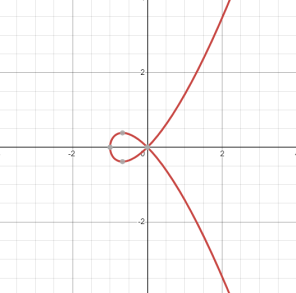

We often want to work over other fields such as $\mathbb{Q}, \mathbb{Z}/p$ where $p$ is prime, etc. and a way to understand their geometry is to look at their maximal ideals. In $\mathbb{C}$, it is much easier because by Hillbert's Nullstalensatz, we know that in $\mathbb{C}[x_1,x_2,\cdots,x_n]/(f)$ the maximal ideals are of the form $(x_1-p_1,x_2-p_2,\cdots,x_n-p_n)$ where $f(p_1,\cdots,p_n)=0$

The problem with other fields is that the maximal ideals are a topological space, but the topology is too weak. By weak, we mean that the neighborhoods of the topology are too big, making it inconvenient to study them in depth. There is no perfect analogy of an $\epsilon$-ball around the origin for such fields when taking similar quotient rings.

Maximal ideals of a polynomial ring of $n$-variables defined over an algebraically closed field $k$ correspond to points in $k^n$. For example, if we take a polynomial ring in two variables $R=k[x,y]$ where $k$ is an algebraically closed field, then the maximal ideals of $R$ all look like $(x-a,y-b)$ where $a,b \in k$. These maximal ideals correspond to point on $k^2$. This is very convenient, however in the case of nonsingular algebraic varieties, it is impossible to find neighborhoods of every point that behaves like  a euclidean neighborhood or a point, in other words like $k^n$. 

As an example, when examining $\mathbb{Z}/5[x,y]/(y-x^2)$, then we notice that there is a finite complement topology on it which means that open sets are complements of finitely many closed sets. Therefore it is not a Hausdorff space. Hausdorff spaces are much nicer to work with in general, so this scenario will give us more difficulties. 



### Ring Completions

To avoid the difficulties, we have a solution called _completion_, where instead we can choose a point in the algebraic variety which corresponds to some maximal ideal in some ring. Then by _completing_ the ring at the maximal ideal, we will always get $k[[x_1,\cdots,x_n]]$ which essentially replaces the neighborhood concept we were looking for in a lot of cases, which is true by the Cohen-Structure theorem. Vaguely speaking, power series rings can work like "small" euclidean neighborhoods of a point on an algebraic variety (the zero set of a multi-variable polynomial over a field).The idea behind is that we are going to look at higher tangent information instead of neighborhoods. Two polynomials are close to each other when they agree in small degree. Then a sequence of polynomials $(f_i)$ is Cauchy if for every $\epsilon$ we can find $N\in \mathbb{N}$ such that for $n,m > N$ then polynomials $f_{n}$ and $f_{m}$ agree in degree less than or equal to $\epsilon$. The objects of the completion of a polynomial ring are equivalent classes of Cauchy sequences. Then equivalence classes of Cauchy sequences are the same as formal power series. This is analogous to set completions in analysis, however here it is much generalized and is used in the same realm as localization.


## Lazy Power Series package
Our package makes it possible to work with formal power series, by specifically introducing an object in Macaulay2 called `LazySeries`. The reasoning behind the name is the construction of the objects, as one of the main constructors is used by inputting an explicit map that outputs the coefficients at any exponent given. This is sort of a "lazy" way of dealing with power series, or rather a generating function approach to it. 

In [1]:
loadPackage "LazyPowerSeries"


o1 = LazyPowerSeries

o1 : Package


### Constructing LazySeries
Most series have enough information to extend their polynomial approximation to 
arbitrary degree when needed. This means that even though sums and products of
series will return finite-precision results, the precision can be increased at
any time. Some of the ways you can construct LazySeries for now are:
     
1. Creating LazySeries by the `lazySeries(Ring, Function)` by using a given ring and function.
2. Creating LazySeries by the `lazySeries(RingElement)` by using a given ringElement.

In [4]:
R = ZZ[x]
f = i-> i
L = lazySeries(R, f)


           2     3
o4 = x + 2x  + 3x  + ... 

o4 : LazySeries


In [7]:
R = ZZ[x]
p = x^5+765*x^4-98*x^3+7

L = lazySeries(p)


            3
o7 = 7 - 98x  + ... 

o7 : LazySeries


### Changing degrees
The default degree of a LazySeries is 3. We can change the degree of a LazySeries object by using the `changeDegree` after having already created an object, or you could also change degree by specifying the optional arguments `DisplayedDegree` and `ComputedDegree` during initial construction by using options. For now, we are using total degree, but we are planning on making it possible to work with graded rings. You can right now, but it will take the sum of the degree if you give it a list instead.

In [8]:
changeDegree(L, 7)


            3       4    5
o8 = 7 - 98x  + 765x  + x  + ... 

o8 : LazySeries


In [9]:
changeDegree(L, 2)


o9 = 7 + ... 

o9 : LazySeries


In [11]:
f = i-> i^2
L = lazySeries(R, f, DisplayedDegree => 15, ComputedDegree => 15)


            2     3      4      5      6      7      8      9       10       11       12       13       14       15
o11 = x + 4x  + 9x  + 16x  + 25x  + 36x  + 49x  + 64x  + 81x  + 100x   + 121x   + 144x   + 169x   + 196x   + 225x   + ... 

o11 : LazySeries


### Extracting coefficients
Sometimes it is convenient to just grab specific coefficients you are looking for and there is a fast way to do it in this package by using `coefficient` method.

In [12]:
coefficient({9}, L)


o12 = 81


In [13]:
coefficient({25}, L)


o13 = 625

o13 : R


### Multi-variable Rings
LazySeries construction works with multi-variable rings as well, as long as the user inputs the function correctly. The function has to have the same amount of inputs as the given ring variables. Here for example, because we are given a polynomial ring of three variables over the rationals, the function inputted takes three inputs (i,j,k). Another way to input a function would be to make it take in a list that you are assuming has the same amount of elements as the variables and sending it to those values. Essentially, we are ensuring the function gives us a coefficient based on the exponents.

In [16]:
R = QQ[x,y,z]
f = (i,j,k)-> i+j+k+5

L = lazySeries(R, f)


                           2                   2            2     3       2       2     2               2      3       2     2      3
o16 = 5 + 6z + 6y + 6x + 7z  + 7y*z + 7x*z + 7y  + 7x*y + 7x  + 8z  + 8y*z  + 8x*z  + 8y z + 8x*y*z + 8x z + 8y  + 8x*y  + 8x y + 8x  + ... 

o16 : LazySeries


In [19]:
R = ZZ/5[x,y,z]
f = (i,j,k)-> 8

L = lazySeries(R, f)


                            2                   2            2     3       2       2     2               2      3       2     2      3
o19 = -2 - 2z - 2y - 2x - 2z  - 2y*z - 2x*z - 2y  - 2x*y - 2x  - 2z  - 2y*z  - 2x*z  - 2y z - 2x*y*z - 2x z - 2y  - 2x*y  - 2x y - 2x  + ... 

o19 : LazySeries


### Addition
You can add two LazySeries together and it creates a new lazySeries with its own unique function. This means that if you want to expand it, you would be able to by changing its degree normally. Of course, substraction works as well.

In [21]:
R = ZZ[x,y]
L = lazySeries(R, (i,j)->i)


                  2      2     2      3
o21 = x + x*y + 2x  + x*y  + 2x y + 3x  + ... 

o21 : LazySeries


In [22]:
M = lazySeries(R, (i,j)->j)


            2           3       2    2
o22 = y + 2y  + x*y + 3y  + 2x*y  + x y + ... 

o22 : LazySeries


In [23]:
S = L+M


                2            2     3       2     2      3
o23 = y + x + 2y  + 2x*y + 2x  + 3y  + 3x*y  + 3x y + 3x  + ... 

o23 : LazySeries


In [24]:
changeDegree(S, 4)


                2            2     3       2     2      3     4       3     2 2     3      4
o24 = y + x + 2y  + 2x*y + 2x  + 3y  + 3x*y  + 3x y + 3x  + 4y  + 4x*y  + 4x y  + 4x y + 4x  + ... 

o24 : LazySeries


In [25]:
S = L-M


                 2     2     3      2    2      3
o25 = -y + x - 2y  + 2x  - 3y  - x*y  + x y + 3x  + ... 

o25 : LazySeries


### Multiplication
One of the concerns for multiplication was speed, but so far it is fast enough. Additionally, we have a more efficient way of calculating powers of LazySeries objects by using exponentiating by squaring method, also known as double-and-add method which uses binary conversion of a power to determine the steps it needs to take to calculate up to that certain power in fewer steps than it would take to primitively multiply that many times. It reduces the amount of steps it would take with the primitive approach, but of course this is an open problem and does not always guarantee the fastest way of calculating the powers.

In [29]:
R = ZZ[x,y]

L = lazySeries(R, (i,j)->1+i)
M = lazySeries(R, (i,j)->j)
L*M


            2            3       2     2
o29 = y + 3y  + 3x*y + 6y  + 9x*y  + 6x y + ... 

o29 : LazySeries


In [30]:
L^2


                      2             2     3        2      2       3
o30 = 1 + 2y + 4x + 3y  + 8x*y + 10x  + 4y  + 12x*y  + 20x y + 20x  + ... 

o30 : LazySeries


In [31]:
L^10


                         2                2       3          2        2         3
o31 = 1 + 10y + 20x + 55y  + 200x*y + 210x  + 220y  + 1100x*y  + 2100x y + 1540x  + ... 

o31 : LazySeries


### Inversion
For inversion, first of all the formal power series has to be invertible and that can be checked if its constant term is invertible in the given ring. We use the formula $(1-x)^{-1} = 1+x+x^2+x^3+...$, which is valid with formal power series as well. The algorithm of our inversion function works like so (it is easier to see in one-variable case but you can expand it to multi0variable just as easily): First we are given a LazySeries L that has the form $$a_0+a_1x+a_2x^2+\cdots$$. We want to make it look like the initial formula we showed, therefore we take out the constant term and separate it from 1 to look like so:
$$a_0(1+\frac{a_1}{a_0}x+\frac{a_2}{a_0}x^2 +\cdots)$$
$$a_0(1-(-\frac{a_1}{a_0}x-\frac{a_2}{a_0}x^2 -\cdots))$$
We can just denote $g := (-\frac{a_1}{a_0}x-\frac{a_2}{a_0}x^2 -\cdots)$ and we have
$$a_0(1-g) $$
If we invert it, then 
$$(a_0(1-g))^{-1} = \frac{1}{a_0}(1+g+g^2+g^3+\cdots) $$

In [33]:
R = ZZ[x,y]
L = lazySeries(R, (i,j)-> 1 + i)


                    2            2    3       2     2      3
o33 = 1 + y + 2x + y  + 2x*y + 3x  + y  + 2x*y  + 3x y + 4x  + ... 

o33 : LazySeries


In [34]:
inverseL = inverse(L)


                           2    2
o34 = 1 - y - 2x + 2x*y + x  - x y + ... 

o34 : LazySeries


In [35]:
L*inverseL


o35 = 1 + ... 

o35 : LazySeries


### Some additional methods
`sub` is a method that promotes LazySeries objects of a specified ring to a new ring, essentially promoting each term to a polynomial in the ring. `isUnit` is a very useful tool to check if a LazySeries object is invertible by checking if the constant term is invertible in the specified ring.

In [38]:
R = ZZ[x,y]
L = lazySeries(R, (i,j)-> 1 + i)
S = QQ[x,y]


o38 = S

o38 : PolynomialRing


In [39]:
newL = sub(L, S)


                    2            2    3       2     2      3
o39 = 1 + y + 2x + y  + 2x*y + 3x  + y  + 2x*y  + 3x y + 4x  + ... 

o39 : LazySeries


In [40]:
class newL.cache.displayedPolynomial


o40 = S

o40 : PolynomialRing


In [41]:
isUnit(L)


o41 = true


In [42]:
M = lazySeries(R, (i,j)->i)


                  2      2     2      3
o42 = x + x*y + 2x  + x*y  + 2x y + 3x  + ... 

o42 : LazySeries


In [43]:
isUnit(M)


o43 = false


## Future goals for the package
The next steps of this project is to expand on our implementation of power series element as an object in Macaulay2 and to build on the object of a ring to make a power series ring subclass. We plan to add more functionality, such as adding more types of constructors, as well as making sure the package works with multi-graded rings. Additionally, we will introduce quotient rings, ideals and modules over a power series, while also making it possible to complete a polynomial ring at a maximal ideal to get a power series ring. We are also interested in exploring the field of $p$-adic numbers $\mathbb{Q}_p$ where $p$ is a prime integer. 
To summarize:
- p-adics
- multi-graded rings
- ring structure
- ideals, modules, quotient rings
- speed improvements

## Bibliography